<a href="https://colab.research.google.com/github/CarysDT/Colab-Notebook/blob/main/Unit_2_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First we need to install the library
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [ ]:
#this is also part of the library, baseline coding tools to help with priors
import preliz as pz

In [ ]:
#thes are other libraries to help with data sets
import numpy as np
import arviz as az
import pymc as pm
import pandas as pd

**I will be analyzing Jake Moody's field goals from his first season in the NFL with the 49ers**

Jake moody is a kicker which means that during football games coaches can decide to have him come out to kick a ball through two high-up goal posts on the other end of the field. This is instead of attempting to score a touchdown. Therefore it is common to have around two to three field goals a game. Field goals typically varry in distance, meaning the kick is sometimes furthur away from the field goal, thus making it more difficult. I however will not be taking that into account, and will only be considering makes and misses of his in-season 2023-2024 games.

We want to find the difference in his college stats, compared to his NFL stats. First we are going to look at his last year in college football with Michigan, this is because it is his most recent season prior to the change in leagues. We want to know his field goal percentage because often times in close games, a field goal can be the difference between winning and loosing, even though they are worth less points than a touchdown. He is entering the NFL for the 2023-24 season and we want to know a baseline of his stats to later figure out what he could look like playing in professional football.

In his 2022-2023 college season with Michigan, he attempted 35 field goals, making 29. Because we are looking at makes and misses, this can lead to a binomial lense which leads us to create a betabinomial graph.

<Axes: >

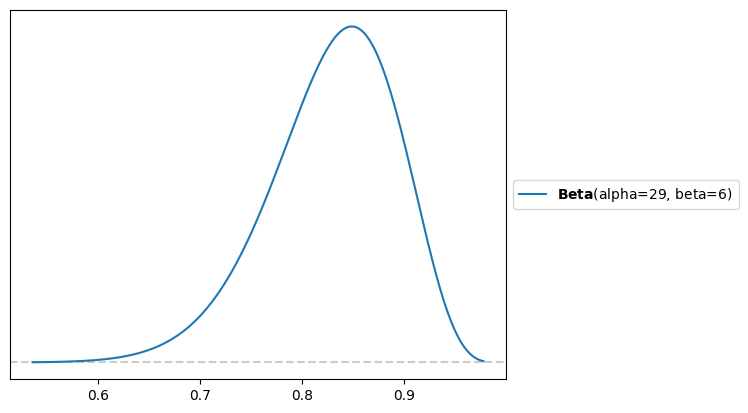

In [ ]:
#this is where we input our data, alpha is set equal to makes, while beta is set equal to misses
#we then ask for a plotted graph of the likelihoods to make or miss
pz.Beta(alpha=29, beta=6).plot_pdf()

FG will stand for Field Goals, we can label the  data of his 2022-2023 season as "prior" since we will later be calculating his projected stats, we can then find the mean, median, and mode of his 2023-24 season to know around how high his FGM percentage is.

In [ ]:
#here we define the prior data range, as factor 1, alpha, and factor 2, beta, as previously done
FG_prior = pz.Beta(alpha=29, beta=6)
#mode is not coded here, so we have to do the calculation
FG_prior_mode = (FG_prior.alpha - 1)/(FG_prior.alpha + FG_prior.beta - 2)
#now to present it all nicely, we are able to find the mean, median, and mode
#all are slight variations and different ways to look at the "middle" or "most likely" outcome and percentage
FG_prior.mean(), FG_prior.median(), FG_prior_mode

(0.8285714285714286, 0.8348641761946591, 0.8484848484848485)

However I think that most kickers experience a dramatic change in stats when they switch from College to NFL football, therefore I believe that Jake Moody's collge stats are not an accurate basis for his future in the NFL. I looked at three of the most recent 49ers kickers before Moody. Looking at their last year in college field goal make percentage, and their first year starting in the NFL. I am using their starting season, not their first season to create a more accurate data set, since Jake Moody started his first year, there is more data (makes and misses) to base it off of. On average their field goal make percentages dropped by two percent, therefore I will apply this to create my prior of what I believe Jake Moody's first season starting NFL stats with the 49ers will look like.


<Axes: >

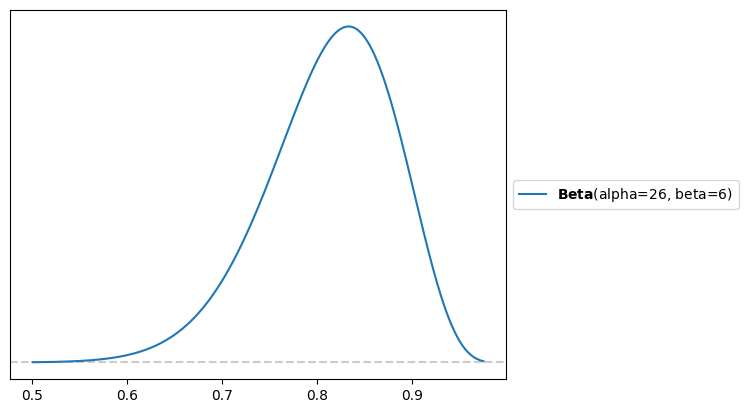

In [ ]:
#the average season field goals for a team in 2023 was 32, so this is the basis we will go off of
#with a prediction of a two percent decrease from college we can then decide that his makes percentage would be roughly 80.86%
pz.Beta(alpha=26, beta=6).plot_pdf()

In [ ]:
#now let's see how many makes and misses it takes to have around an 80% make rate in a 32 attempt season
FG_prediction = pz.Beta(alpha=26, beta=6)
FG_prediction.mean()

0.8125

By looking at the mean I am able to see the change in using college stats as a prior, versus my prediction for his 2023 NFL season.



Now he has played in his first NFL season, woohoo! We can now calculate what his NFL season looked like, in comparison to our priors.

In [ ]:
#here we set a value to a make and miss, this actually translates the numbers into something easily comprehensible, 1 or 0
FG_makes = np.repeat (1, 21)
#here we are setting misses equal to 0
FG_misses = np.repeat (0,4)
#this combines the makes and misses into one array
FG_data = np.concatenate ( [FG_makes, FG_misses])

In [ ]:
#here we connect a model specifically to Jake Moody's projectd FG
with pm.Model () as Jmoody_FG_model:
#we then define the prior using theta
#it's also important to note that alpha and beta are made into floats through the use of "."
  θ = pm.Beta('θ' , alpha = 21. , beta = 4.)
#now we define our likelihood for his next season
#Bernouli is used to stand in for the binomial distribution
  y = pm.Bernoulli('y', p = θ, observed = FG_data)
#now we sample our posterior and create new numbers, which are now our predictions
  idata_FG = pm.sample(1000)

In [ ]:
#this allows visualization
import arviz as az

<Axes: title={'center': 'θ'}>

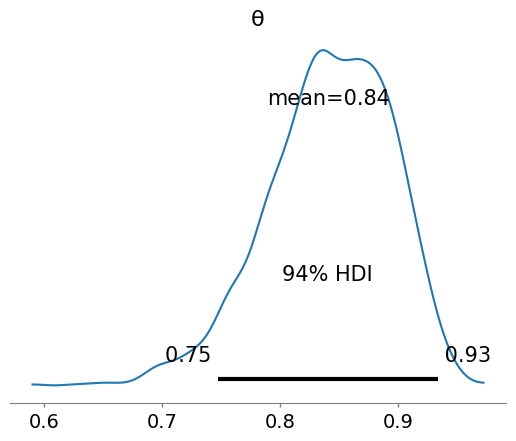

In [ ]:
#this is a graph of the 1000 posteriors we created, it should be a more detailed version of the previous graph
#slightly more accurate due to the large amount of data to draw from
az.plot_posterior(idata_FG)

This is higher than I thought it would be, due to the fact that I expected there to be a decrease in his college stats compared to his NFL stats. I am suprised that he had such a good season his rookie year, and because of this expect him to have an even better season in 2024-2025.

**now time to make our predictions**

In [ ]:
#first we take the samples from the posterior, which are stored in idata_FG
#we then reference the model that created the samples that we labled Jmoody_FG_model
#finally we store these predictions together with the posterior under idata_FG
pm.sample_posterior_predictive(idata_FG, model=Jmoody_FG_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [ ]:
#here are Jake Moody's makes and misses connected to values of 1 and 0
FG_data_2324 = np.repeat([1,0], repeats = (21,4))
with pm.Model() as Jmoody_FG_model:
#same prior as before
  θ = pm.Beta('θ' , alpha = 21. , beta = 4.)
#add in our likelihood, with our binomial distribution placeholder Bernoulli
  y = pm.Bernoulli('y', p = θ, observed = FG_data_2324)
#now we sample from the 2000 compiled samples for more precision
  idata_FG_2324 = pm.sample(2000)

here is a visualization of the 2000 compiled samples of the posterior

<Axes: title={'center': 'θ'}>

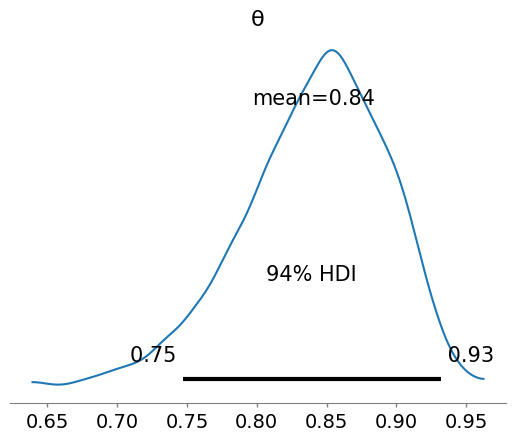

In [ ]:
az.plot_posterior(idata_FG_2324)

In [ ]:
#here we generate the actual predictions
pm.sample_posterior_predictive(idata_FG_2324, model=Jmoody_FG_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [ ]:
#now we stack the two chains again
stacked_FG_2324 = az.extract(idata_FG_2324, group = "posterior_predictive")

In [ ]:
stacked_FG_2324.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1])

We now are able to see Jake Moody's next predicted 25 field goals, once again the 1s represent a make, while the zeros represent a miss. This shows a 92% sucess rate for the 2024-2025 season, so my prediction of a increase from 2023-24 is theoretically accurate.

If I were to improve the accuracy of this data in any way, I would attempt to move away from a binomial factor of make or miss, and allow it to be more dependent on the situation, such as the distance from the field goal.